# BibMon - Biblioteca de Monitoramento de Processos

# Grupo EngePol

Neste notebook, é demonstrada a aplicação de técnicas de regressão para monitoramento, utilizando amostras de dados reais de processo disponibilizadas na BibMon.

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import bibmon

import matplotlib.pyplot as plt
plt.style.use('default')

## Importando dados

Para importar os dados em questão, deve-se utilizar a função `load_real_process_data()`:

In [2]:
df_raw = bibmon.carregar_dados_reais()

Inspecionando o DataFrame:

In [3]:
display(df_raw)
display(df_raw.describe())

tag0      tag1          tag2  tag3   tag4       tag5  \
2017-12-24 00:00:00   55.0  63.78137  Inp OutRange  24.0  65.08   96.20708   
2017-12-24 00:05:00   55.0  63.19825      215.6439  24.0  65.08   96.26451   
2017-12-24 00:10:00   55.0  60.59476      216.8394  24.0  65.08   96.13637   
2017-12-24 00:15:00   55.0  57.37687      216.0174  24.0  65.08   96.13800   
2017-12-24 00:20:00   55.0  55.50652      235.2574  24.0  65.08   96.13963   
...                    ...       ...           ...   ...    ...        ...   
2018-01-03 23:40:00  100.0  44.08384      216.2967  26.0  65.08  107.41660   
2018-01-03 23:45:00  100.0  62.70091      214.4082  26.0  65.08  107.49880   
2018-01-03 23:50:00  100.0  40.99437      204.6031  26.0  65.08  107.41540   
2018-01-03 23:55:00  100.0   0.06060      217.3482  26.0  65.08  107.44830   
2018-01-04 00:00:00  100.0  26.72386      207.4122  26.0  65.08  107.47750   

                         tag6      tag7      tag8        tag9  ...     tag98  \
2017-12-24 00:00:00  0.307896  68.25478  74.44640    0.095771  ...  24.33657   
2017-12-24 00:05:00  0.306792  67.93334  73.82326    0.091627  ...  24.31973   
2017-12-24 00:10:00  0.305688  67.99210  74.26359    0.087483  ...  24.30289   
2017-12-24 00:15:00  0.304583  68.08345  74.35086    0.083339  ...  24.28605   
2017-12-24 00:20:00  0.303479  68.42300  74.57907    0.079195  ...  24.26921   
...                       ...       ...       ...         ...  ...       ...   
2018-01-03 23:40:00  0.000000  65.52056  73.76835  130.009700  ...  26.05442   
2018-01-03 23:45:00  0.000000  60.93009  66.08367  137.332900  ...  26.01985   
2018-01-03 23:50:00  0.000000  65.80190  74.00961  134.402500  ...  25.98529   
2018-01-03 23:55:00  0.000000  65.18890  72.98434  110.296900  ...  25.95072   
2018-01-04 00:00:00  0.000000  67.45410  77.55890  117.221000  ...  25.91616   

                        tag99    tag100     tag101    tag102    tag103  \
2017-12-24 00:00:00  24.78124    0.0000  1005.3220    0.0000  6.460864   
2017-12-24 00:05:00  24.76462    0.0000  1058.1170    0.0000  5.666753   
2017-12-24 00:10:00  24.74800    0.0000   983.2982    0.0000  5.209028   
2017-12-24 00:15:00  24.73138    0.0000   951.2489    0.0000  5.485637   
2017-12-24 00:20:00  24.71476    0.0000  1019.6220    0.0000  5.619418   
...                       ...       ...        ...       ...       ...   
2018-01-03 23:40:00  26.62112  873.3400     0.0000  113.7940 -2.700305   
2018-01-03 23:45:00  26.58993  865.0013     0.0000  111.8702 -2.700305   
2018-01-03 23:50:00  26.55873  869.6612     0.0000  111.0677 -2.700305   
2018-01-03 23:55:00  26.52754  835.1274     0.0000  103.6458 -2.700305   
2018-01-04 00:00:00  26.49635  847.0594     0.0000  108.6488 -2.700305   

                       tag104    tag105    tag106    tag107  
2017-12-24 00:00:00  132.9076  133.7032  28.08373  33.35916  
2017-12-24 00:05:00  132.8801  134.3118  28.05780  33.52589  
2017-12-24 00:10:00  132.8527  134.7653  28.03188  33.69263  
2017-12-24 00:15:00  132.8253  134.3101  28.00595  33.85936  
2017-12-24 00:20:00  132.7978  133.1919  27.98002  34.02610  
...                       ...       ...       ...       ...  
2018-01-03 23:40:00  159.4808  154.7427  37.44136  29.96094  
2018-01-03 23:45:00  155.0297  154.7427  37.32219  29.96094  
2018-01-03 23:50:00  157.1314  154.7427  37.20302  29.96094  
2018-01-03 23:55:00  156.4066  154.7427  37.08385  29.96094  
2018-01-04 00:00:00  156.2319  154.7427  36.96468  29.96094  

[3169 rows x 108 columns]

tag0         tag1         tag3          tag4         tag5  \
count  3169.000000  3169.000000  3169.000000  3.169000e+03  3169.000000   
mean     41.403398    27.519168    25.674976  6.508000e+01    81.052815   
std      22.123240    30.658114     2.668869  2.842619e-14    33.301358   
min       0.000000     0.000000    20.000000  6.508000e+01     0.000000   
25%      29.000000     0.017779    24.000000  6.508000e+01    56.954070   
50%      40.000000    16.124840    26.000000  6.508000e+01    84.532750   
75%      55.000000    46.057540    26.000000  6.508000e+01   104.925800   
max     100.000000   100.000000    30.000000  6.508000e+01   167.333200   

              tag6         tag7         tag8         tag9        tag10  ...  \
count  3169.000000  3169.000000  3169.000000  3169.000000  3169.000000  ...   
mean      0.950959    51.190112    55.917353     9.089116    77.608638  ...   
std       7.003782    28.582479    31.777864    33.076033    58.638458  ...   
min       0.000000     0.000413     0.000000     0.000000     0.000000  ...   
25%       0.192803    57.687660    61.499630     0.000000     0.000000  ...   
50%       0.265000    65.719710    72.526710     0.025375   104.494100  ...   
75%       0.371000    68.500080    75.007610     0.121337   121.150500  ...   
max      76.760990    80.242340    90.740720   190.405900   185.557900  ...   

             tag98        tag99       tag100       tag101       tag102  \
count  3169.000000  3169.000000  3169.000000  3169.000000  3169.000000   
mean     30.262697    30.836609   707.915055    78.530783    86.570521   
std       5.458972     5.651248   283.968031   275.079371    48.713833   
min      22.619020    23.276270     0.000000     0.000000     0.000000   
25%      25.459850    25.823600   543.711100     0.000000    48.073450   
50%      28.517750    28.817000   774.643100     0.000000    89.421850   
75%      35.179620    36.278480   892.242500     0.000000   117.890800   
max      45.111410    44.214160  1448.658000  1325.787000   275.862900   

            tag103       tag104       tag105       tag106       tag107  
count  3169.000000  3169.000000  3169.000000  3169.000000  3169.000000  
mean     -0.833886   163.559639   158.897702    42.529239    30.534321  
std       2.094671    17.852191    18.560872     5.948613     5.174762  
min      -5.848371    85.132670    80.802630    26.113220    22.918210  
25%      -1.489031   154.869500   149.765500    38.556230    26.134490  
50%      -1.255939   162.678300   158.055900    43.070750    29.179240  
75%      -0.968033   168.014800   164.220400    46.799140    34.771290  
max      11.375630   327.665600   322.924300    55.365310    45.078720  

[8 rows x 103 columns]

Como há valores não-numéricos, um tratamento dos dados é necessário. Pode-se usar a função `pd.to_numeric()` para converter as colunas do DataFrame para valores numéricos:

In [4]:
df_num = df_raw.apply(pd.to_numeric, errors='coerce')

O argumento `errors='coerce'` especifica que todos os valores que não puderam ser convertidos para números são transformados em NaN (Not a Number).

É boa prática verificar quais strings foram convertidas, já que algumas variáveis podem ser de natureza categórica e conter informações relevantes (por exemplo, variáveis booleanas do tipo 'On/Off', 'Aberto/Fechado', etc). Nesses casos, não faria sentido substituir os valores por NaN.

In [5]:
tags_nans = df_num.columns[df_num.isna().any()].tolist()
tags_nans

print('Número, por tag, de strings sendo trocadas por NaN:\n')

for tag in tags_nans:
    print(tag, 
          df_raw[tag].loc[df_raw[tag][df_num[tag].isnull()].index].unique().tolist(),
          df_num[tag].isnull().sum())

Número, por tag, de strings sendo trocadas por NaN:

tag2 ['Inp OutRange'] 156
tag34 ['Bad'] 14
tag36 ['Scan Timeout'] 1
tag70 ['Bad'] 326
tag72 ['Scan Timeout'] 1


Parece que, em todos os casos, a substituição por NaN foi adequada.

## Modelagem e monitoramento

Em análises offline na BibMon, usualmente efetuamos a separação do conjunto de dados em treino, validação e teste. Os dados de treino são utilizados para gerar o modelo. Os dados de validação são utilizados para avaliar o desempenho do modelo e redefinir o limite de detecção de falhas para compensar pequenos níveis de sobreajuste do treino. Os dados de teste também são utilizados para avaliar o desempenho do modelo, mas já com o novo limite e possivelmente contendo falhas.

Caso a separação treino-validação-teste seja feita em faixas de dados consecutivas, a função `train_val_test_split` possibilita uma maneira prática de efetuá-la:

In [6]:
(X_treino, X_validacao, 
 X_teste, Y_treino, 
 Y_validacao, Y_teste) = bibmon.train_val_test_split(df_num, 
                                                     start_treino = '2017-12-24T12:00', 
                                                     end_treino = '2018-01-01T00:00', 
                                                     end_validacao = '2018-01-02T00:00', 
                                                     end_teste = '2018-01-04T00:00',
                                                     tags_Y = 'tag100')

Definindo o modelo:

In [7]:
modelo = bibmon.Autoencoder()
modelo2 = bibmon.Autoencoder()

In [8]:
param_dict = {'hidden_layer_sizes': (50),'max_iter':1000}
param_dict2 = {'hidden_layer_sizes': (20,10,5,10,20),'max_iter':1000}
modelo.setar_hiperparametros(param_dict)

In [18]:
#from sklearn.ensemble import RandomForestRegressor  
#reg = RandomForestRegressor(n_jobs=-1, random_state=1)

#modelo = bibmon.sklearnRegressor(reg) 

NameError: name 'RandomForestRegressor' is not defined

In [7]:
#from sklearn.ensemble import RandomForestRegressor  
#reg = RandomForestRegressor(n_jobs=-1, random_state=1)

#modelo = bibmon.sklearnRegressor(reg) 

Definindo as funções de pré-processamento de dados:

In [9]:
preproc_tr = ['cortar_variaveis_vazias',
              'ffill_nan',
              #'cortar_observacoes_com_nan',
              'cortar_variaveis_congeladas',
              #'add_media_movel',
              #'aplicar_lag'
              #'filtro_media_movel',
             ]

#args_preproc_tr = {'filtro_media_movel__WS': 20, 'aplicar_lag__lag':2}

preproc_ts = ['substituir_nan_por_valores'
              #'ffill_nan', 
              #'cortar_observacoes_com_nan'
              #'add_media_movel',
              #'aplicar_lag',
              #'filtro_media_movel',
             ]

args_preproc_ts = {'substituir_nan_por_valores__val': X_treino.median()}

Definindo as métricas de regressão a serem exibidas:

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

mtr = [r2_score, mean_absolute_error]

A função `analise_completa` automatiza os processos de treino, validação e teste e fornece rapidamente uma visualização gráfica de toda a análise:

Wall time: 12.7 s


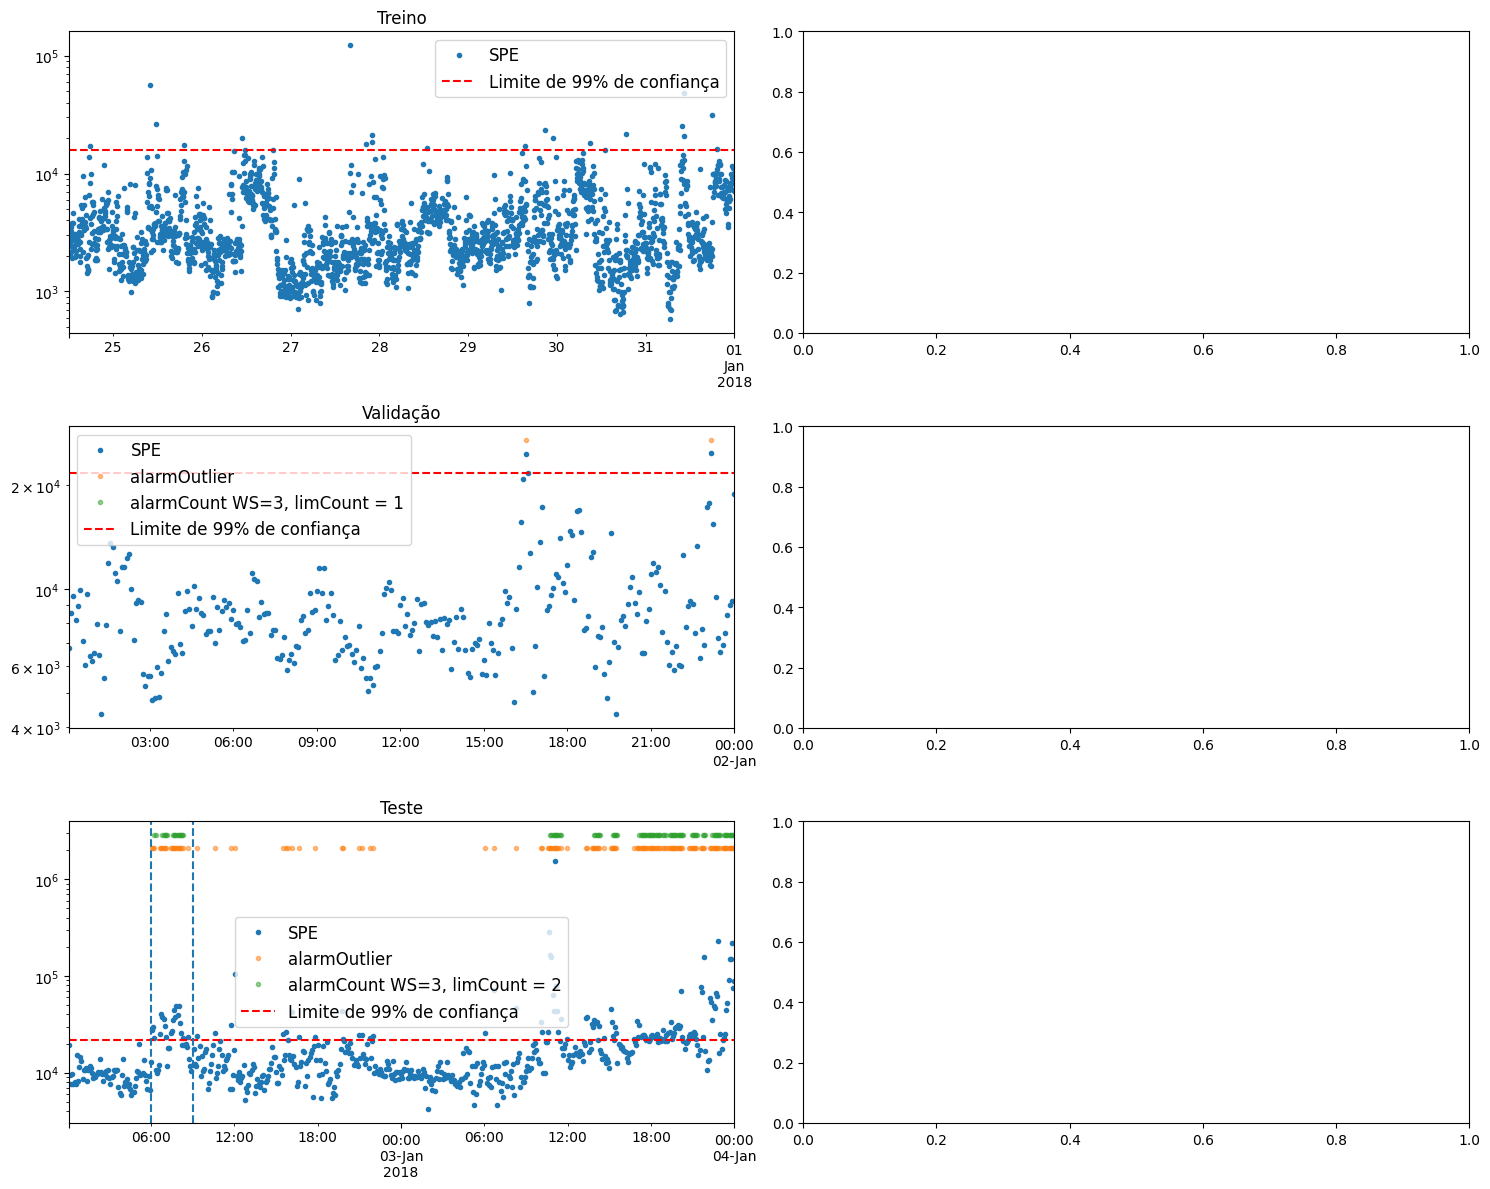

In [26]:
%%time
bibmon.analise_completa(modelo, X_treino, X_validacao, X_teste, 
                        Y_treino, Y_validacao, Y_teste,
                        f_pp_treino = preproc_tr,
                        f_pp_teste = preproc_ts,
                        #a_pp_treino = args_preproc_tr,
                        a_pp_teste = args_preproc_ts,                        
                        metricas = mtr, tam_janela_count = 3, limCount = 2,
                        falha_inicio = '2018-01-02 06:00:00',
                        falha_fim = '2018-01-02 09:00:00')    

Wall time: 5.82 s


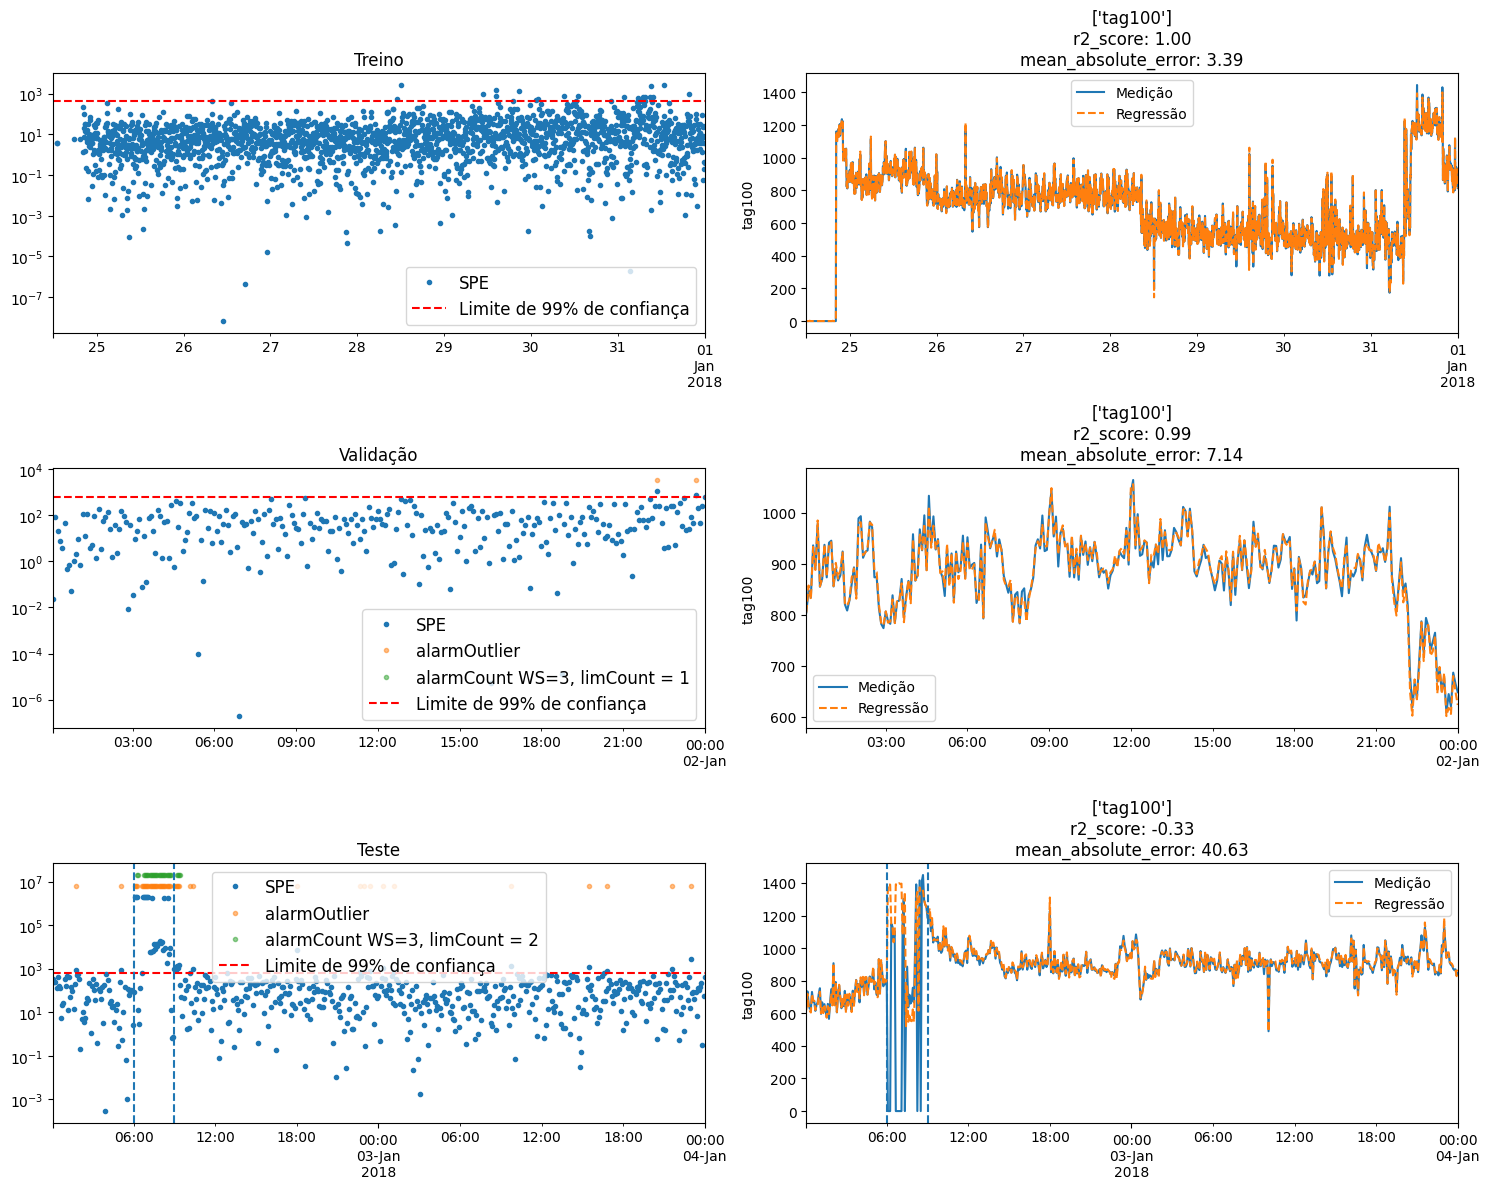

In [9]:
%%time
bibmon.analise_completa(modelo, X_treino, X_validacao, X_teste, 
                        Y_treino, Y_validacao, Y_teste,
                        f_pp_treino = preproc_tr,
                        f_pp_teste = preproc_ts,
                        #a_pp_treino = args_preproc_tr,
                        a_pp_teste = args_preproc_ts,                        
                        metricas = mtr, tam_janela_count = 3, limCount = 2,
                        falha_inicio = '2018-01-02 06:00:00',
                        falha_fim = '2018-01-02 09:00:00')                       

É notável o fato de que usar o `alarmCount` (que no caso acima só dispara quando, em uma janela de 3 pontos, 2 pontos encontram-se acima do limite) reduz significativamente a quantidade de falsos alarmes.

## Comparando modelos

A função `tabela_comparativa` possibilita a comparação de vários modelos.

Para isso, definiremos os vários modelos de regressão em uma lista:

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

sklearn_regs = [LinearRegression(), LassoCV(), SVR(), 
                RandomForestRegressor(n_jobs=-1,random_state=1), 
                MLPRegressor()]

modelos = [bibmon.sklearnRegressor(reg) for reg in sklearn_regs]

modelos.append(bibmon.ESN())

É importante adicionar a normalização no pipeline de pré-processamento, já que é útil efetuar essa operação para os demais modelos que não o `RandomForest`:

In [11]:
preproc_tr.append('normalizar')
preproc_ts.append('normalizar')

A API da `tabela_comparativa` é praticamente a mesma da função `analise_completa`, com a diferença de que fornece-se uma lista de modelos como primeiro argumento (além de mais alguns argumentos opcionais adicionais, não mostrados aqui):

Wall time: 17.1 s


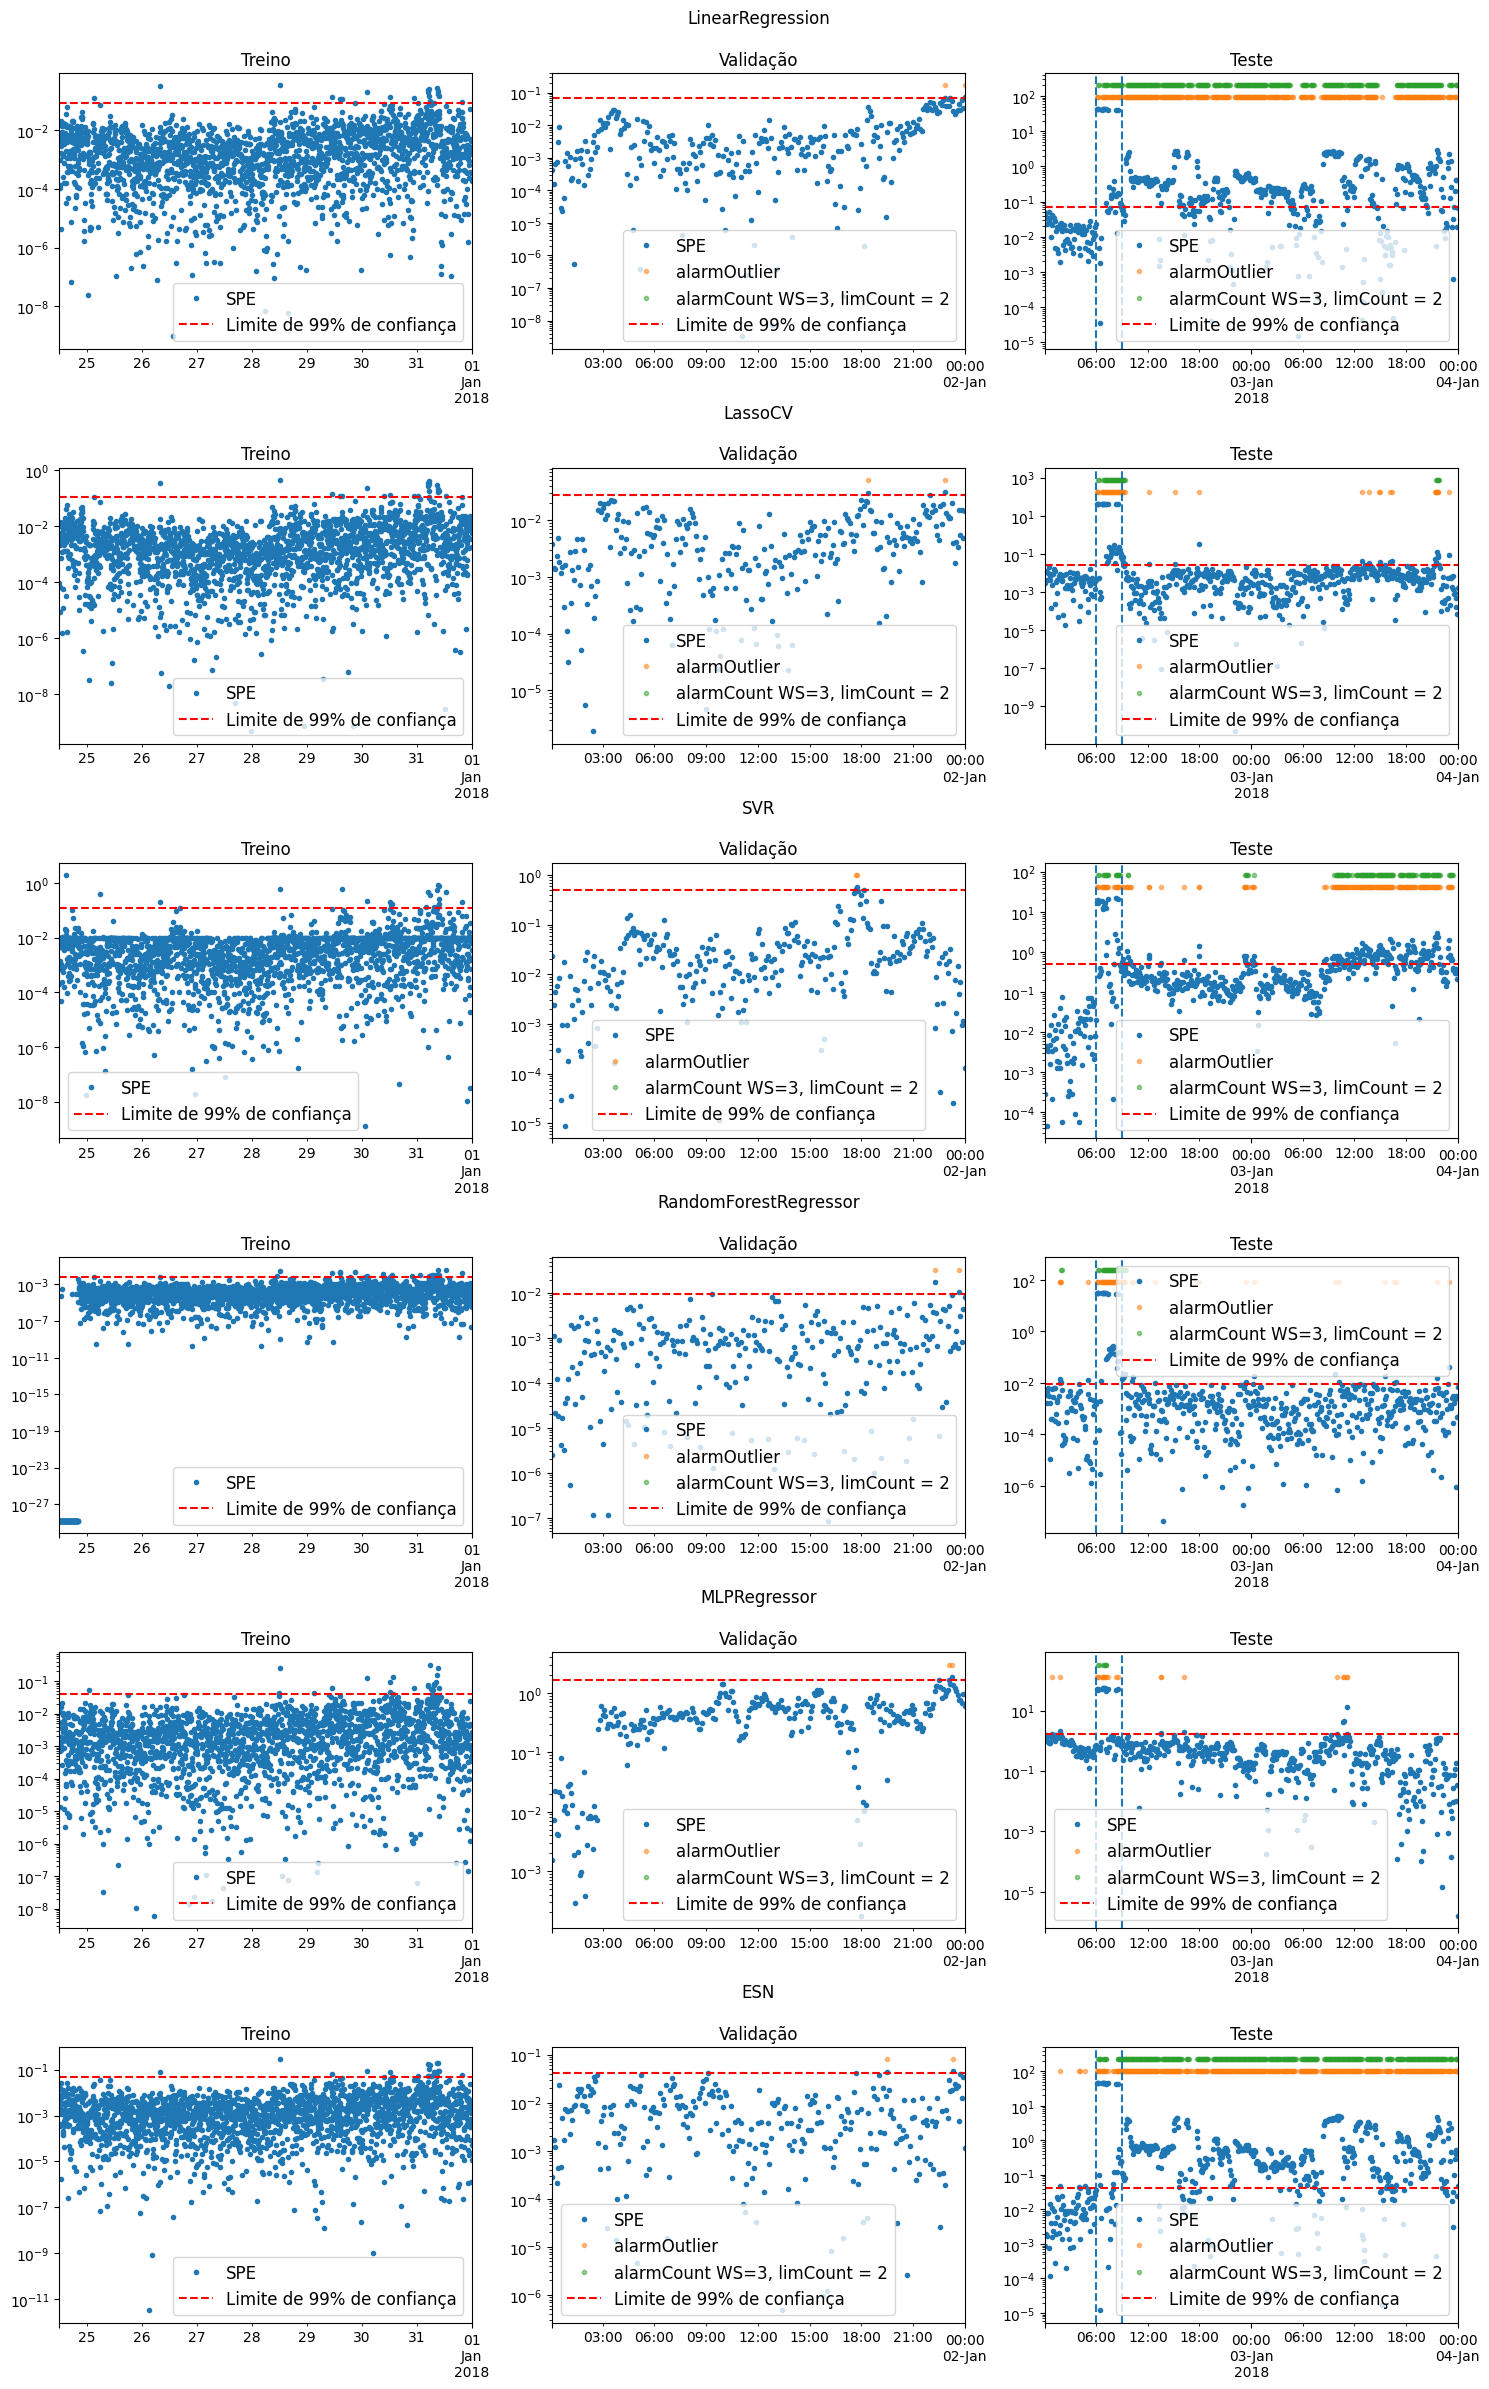

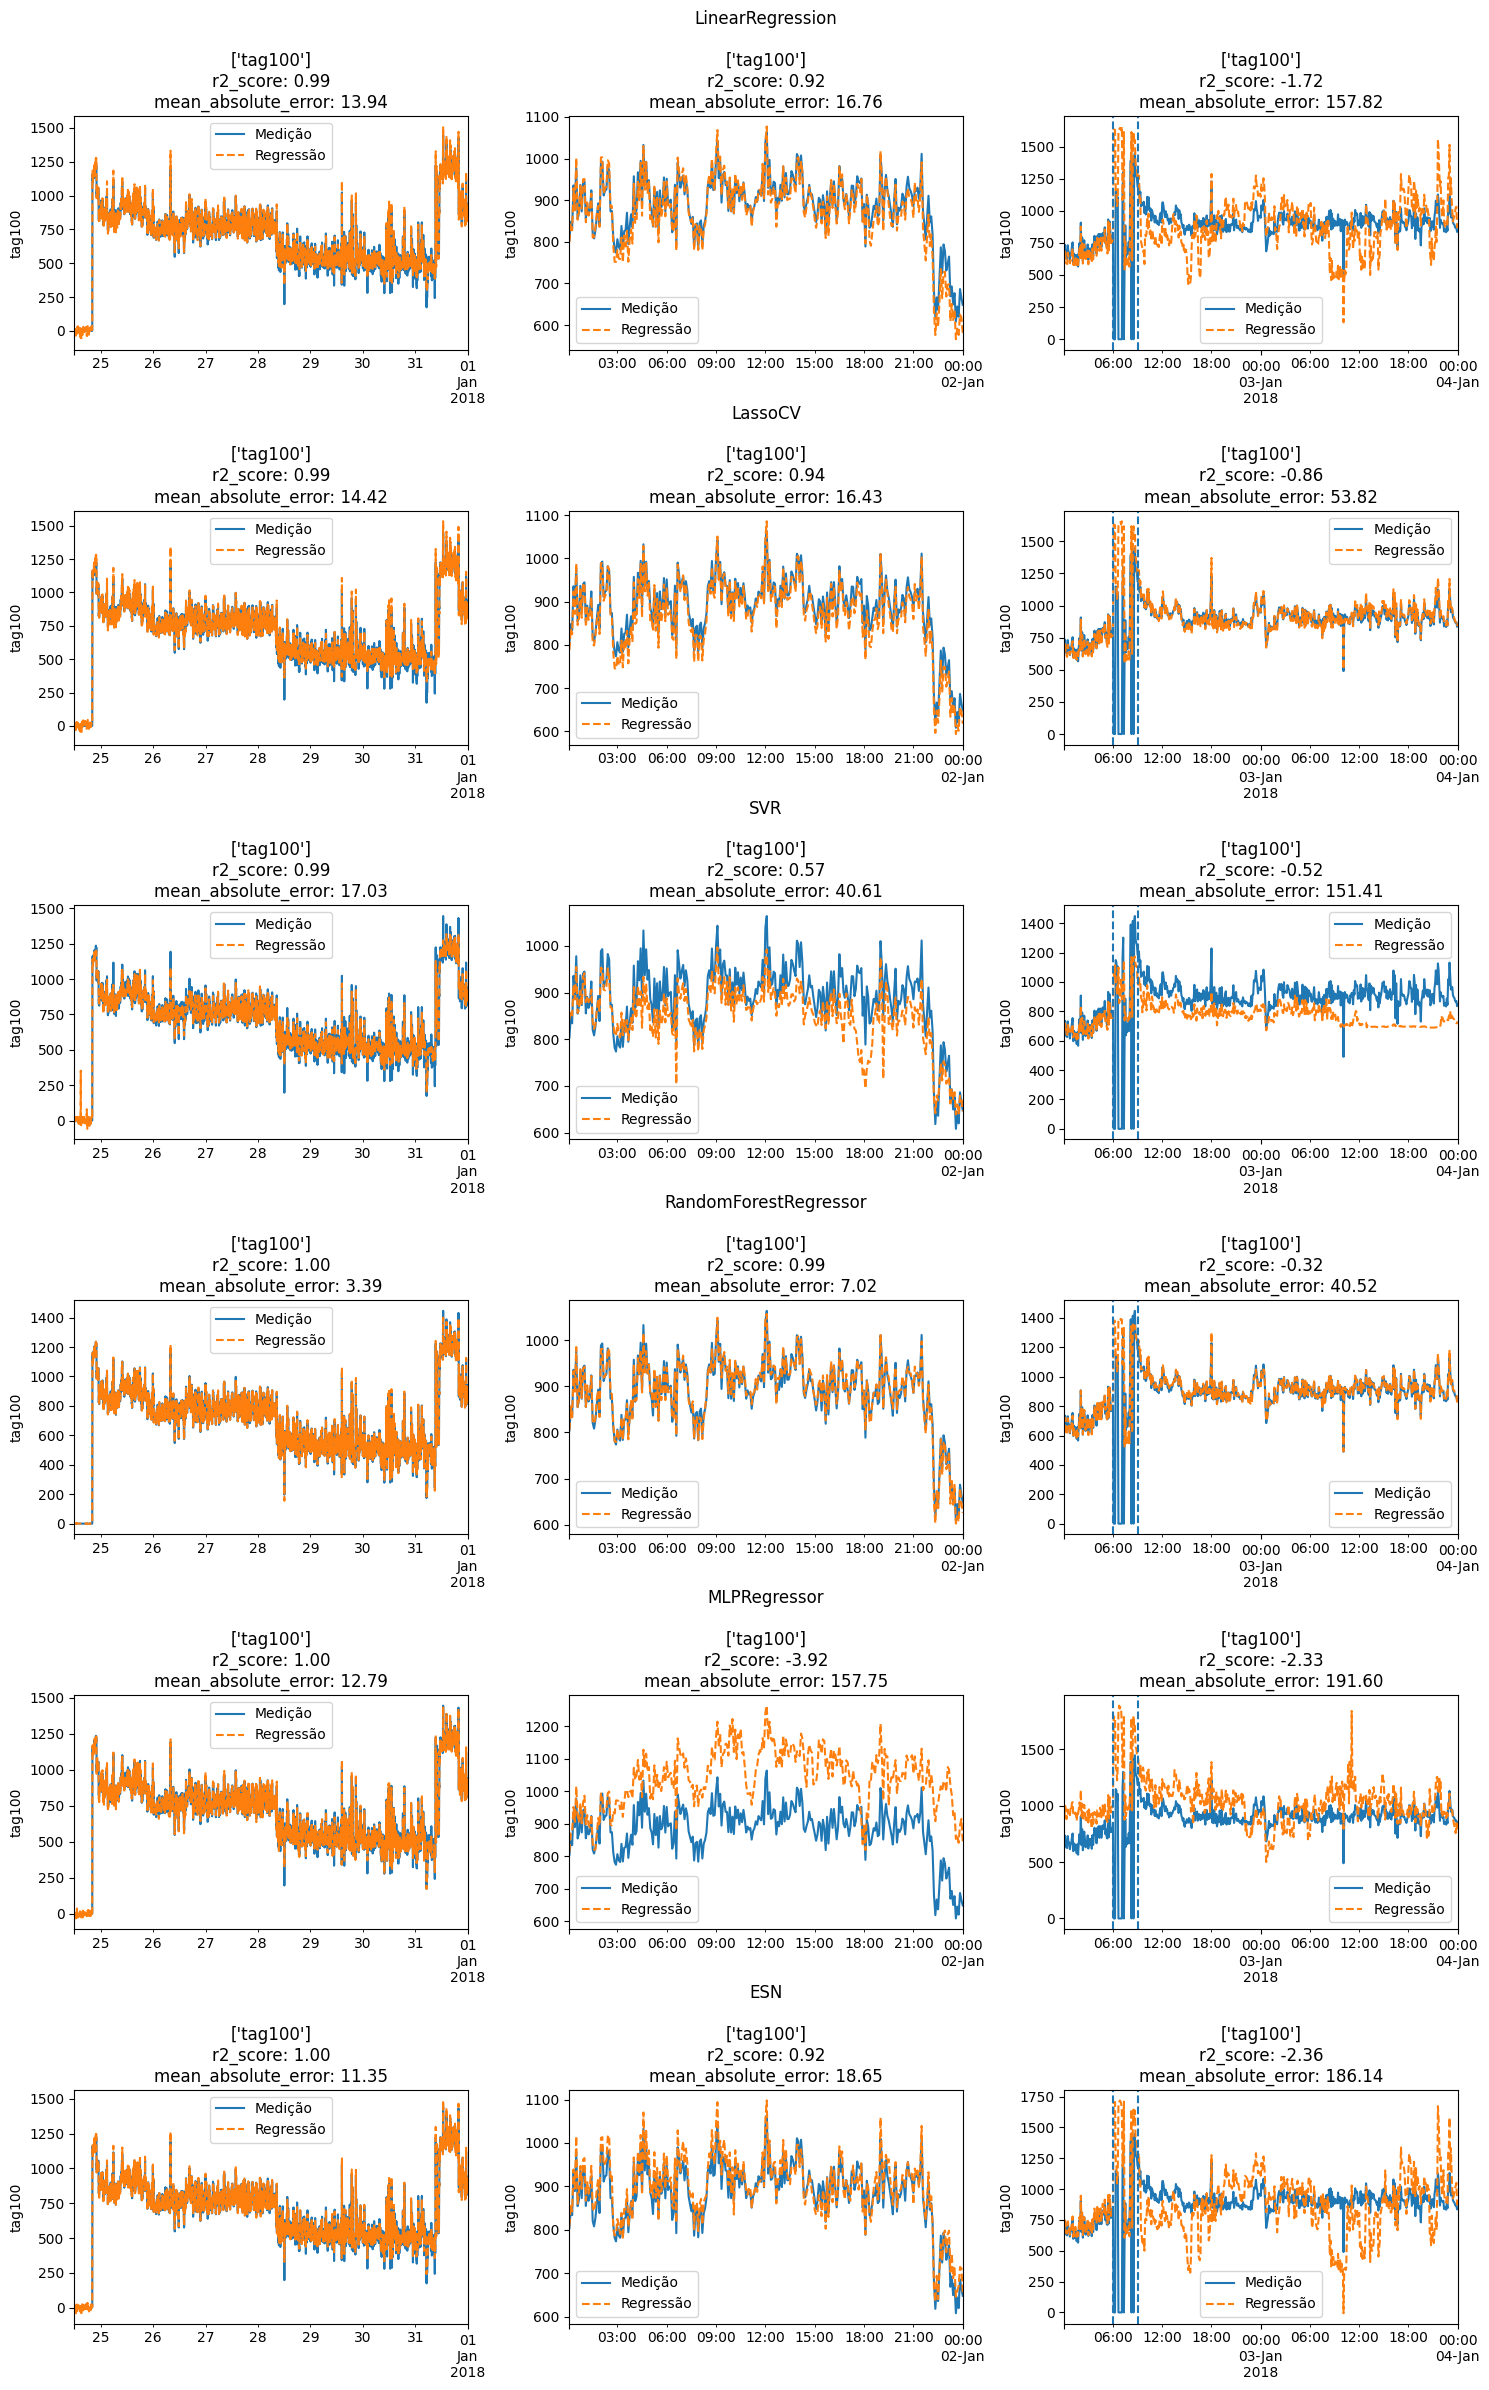

In [12]:
%%time
tab_pred, tab_detec, tab_times = bibmon.tabela_comparativa(modelos, X_treino, X_validacao, X_teste, 
                                                           Y_treino, Y_validacao, Y_teste,
                                                           f_pp_treino = preproc_tr,
                                                           f_pp_teste = preproc_ts,
                                                           #a_pp_treino = args_preproc_tr,
                                                           a_pp_teste = args_preproc_ts,                        
                                                           metricas = mtr, tam_janela_count = 3, limCount = 2,
                                                           falha_inicio = '2018-01-02 06:00:00',
                                                           falha_fim = '2018-01-02 09:00:00')                       

Visualizando a tabela de métricas de predição:

In [13]:
tab_pred.round(3)

Treino  Validação    Teste
Métricas            Modelos                                          
mean_absolute_error ESN                    11.351     18.652  186.142
                    LassoCV                14.419     16.426   53.817
                    LinearRegression       13.937     16.765  157.817
                    MLPRegressor           12.787    157.748  191.603
                    RandomForestRegressor   3.389      7.023   40.519
                    SVR                    17.028     40.611  151.409
r2_score            ESN                     0.996      0.918   -2.357
                    LassoCV                 0.993      0.940   -0.865
                    LinearRegression        0.994      0.917   -1.719
                    MLPRegressor            0.995     -3.923   -2.334
                    RandomForestRegressor   1.000      0.987   -0.322
                    SVR                     0.990      0.567   -0.515

Visualizando a tabela de alarmes:

In [14]:
tab_detec.round(3)

FDR    FAR
Alarmes                       Modelos                            
alarmCount WS=3, limCount = 2 ESN                    0.417  0.722
                              LassoCV                0.778  0.019
                              LinearRegression       0.639  0.615
                              MLPRegressor           0.194  0.000
                              RandomForestRegressor  0.750  0.011
                              SVR                    0.472  0.226
alarmOutlier                  ESN                    0.611  0.744
                              LassoCV                0.833  0.037
                              LinearRegression       0.722  0.650
                              MLPRegressor           0.333  0.019
                              RandomForestRegressor  0.806  0.041
                              SVR                    0.528  0.269

Visualizando a tabela de tempos computacionais (medidos em segundos por um milhão de observações processadas):

In [15]:
tab_times.round(2)

Treino   Teste
LinearRegression          7.21    0.00
LassoCV                  73.77    0.00
SVR                     151.97  121.25
RandomForestRegressor  1739.22  210.80
MLPRegressor            626.43    1.71
ESN                     498.47  162.64

Por default, as tabelas vêm organizadas com os modelos no segundo nível de profundidade dos índices. Mas é possível inverter e colocar os modelos no primeiro nível:

In [16]:
tab_pred.swaplevel().sort_index(0).round(3)

Treino  Validação    Teste
Modelos               Métricas                                       
ESN                   mean_absolute_error  11.351     18.652  186.142
                      r2_score              0.996      0.918   -2.357
LassoCV               mean_absolute_error  14.419     16.426   53.817
                      r2_score              0.993      0.940   -0.865
LinearRegression      mean_absolute_error  13.937     16.765  157.817
                      r2_score              0.994      0.917   -1.719
MLPRegressor          mean_absolute_error  12.787    157.748  191.603
                      r2_score              0.995     -3.923   -2.334
RandomForestRegressor mean_absolute_error   3.389      7.023   40.519
                      r2_score              1.000      0.987   -0.322
SVR                   mean_absolute_error  17.028     40.611  151.409
                      r2_score              0.990      0.567   -0.515

### Análise de importâncias das variáveis

É possível calcular importâncias das variáveis para todos os modelos do `scikit-learn`. Alguns modelos efetuam esse cálculo de forma nativa; de qualquer forma, é possível efetuá-lo para os demais modelos especificando o argumento `permutation_importance=True` na inicialização.

Para visualizar as importâncias, deve-se usar o método `plotar_importancias`:

tag102    9.940067e-01
tag104    7.568390e-04
tag105    4.197095e-04
tag97     2.530352e-04
tag41     2.528834e-04
              ...     
tag56     2.889037e-06
tag64     1.698946e-06
tag63     9.681249e-07
tag67     3.215275e-07
tag95     5.280682e-09
Name: Importancias, Length: 91, dtype: float64

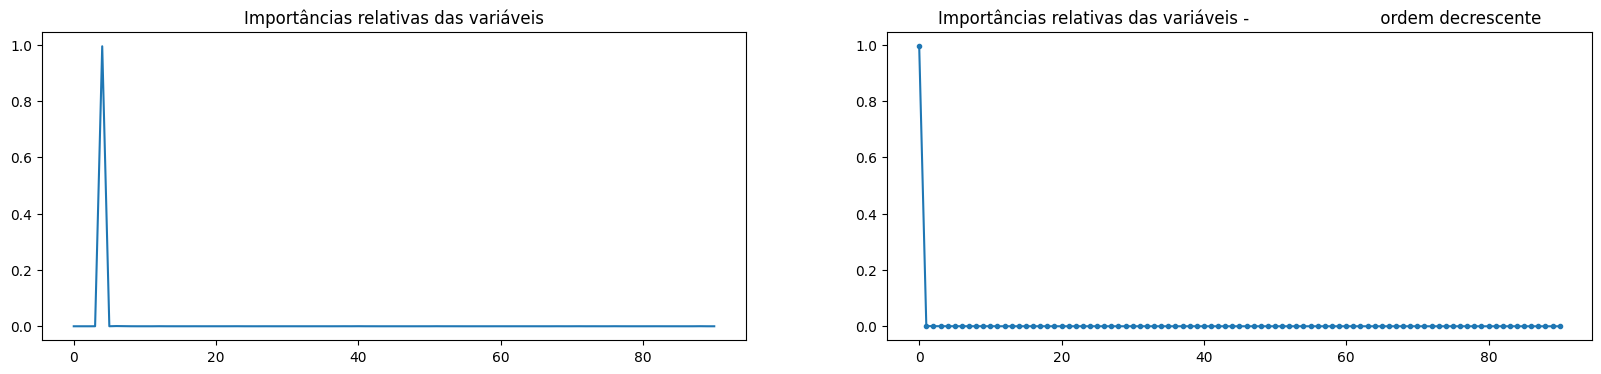

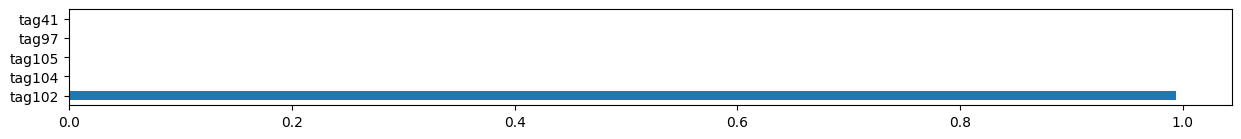

In [17]:
modelos[-3].plotar_importancias(n=5)

O resultado acima indica que o `RandomForest` foi eficiente em selecionar apenas uma variável de interesse, dentre as mais de 100 variáveis disponíveis no conjunto X.

Para uma comparação mais justa entre os desempenhos dos modelos em si, excluindo suas habilidade em selecionar variáveis, é útil recalcular a tabela comparativa utilizando como conjunto X apenas a variável identificada pelo `RandomForest`: 

Wall time: 12.3 s


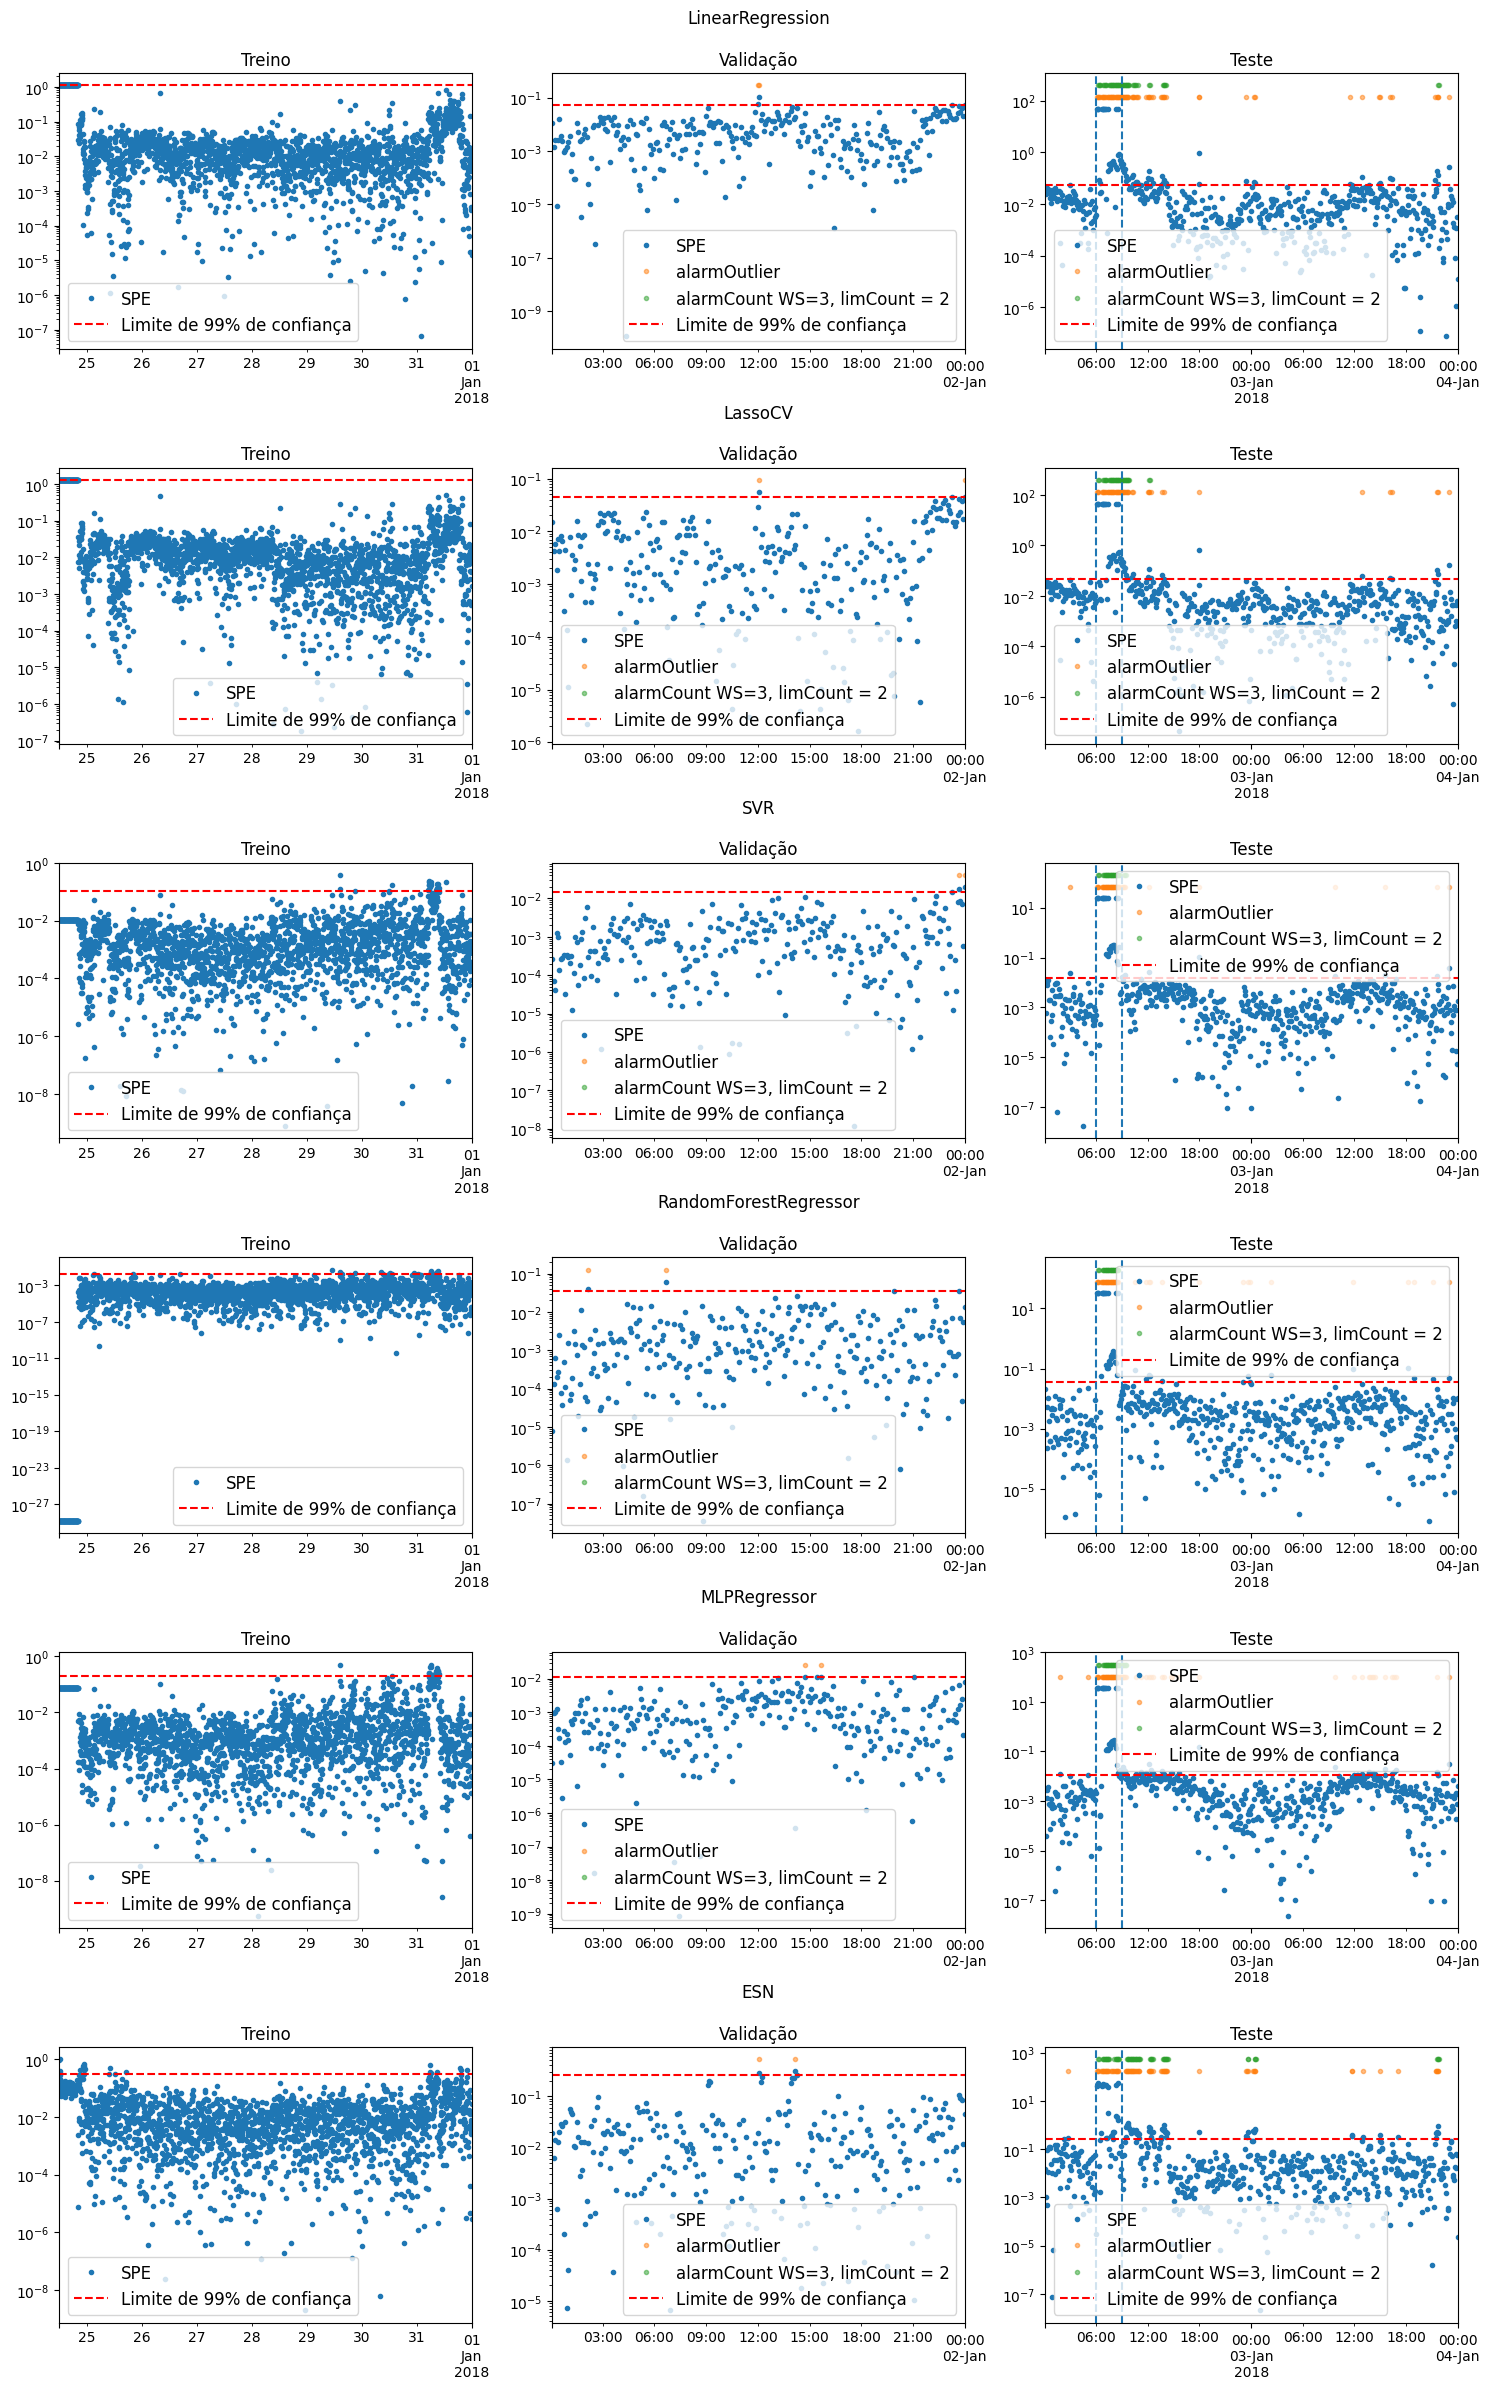

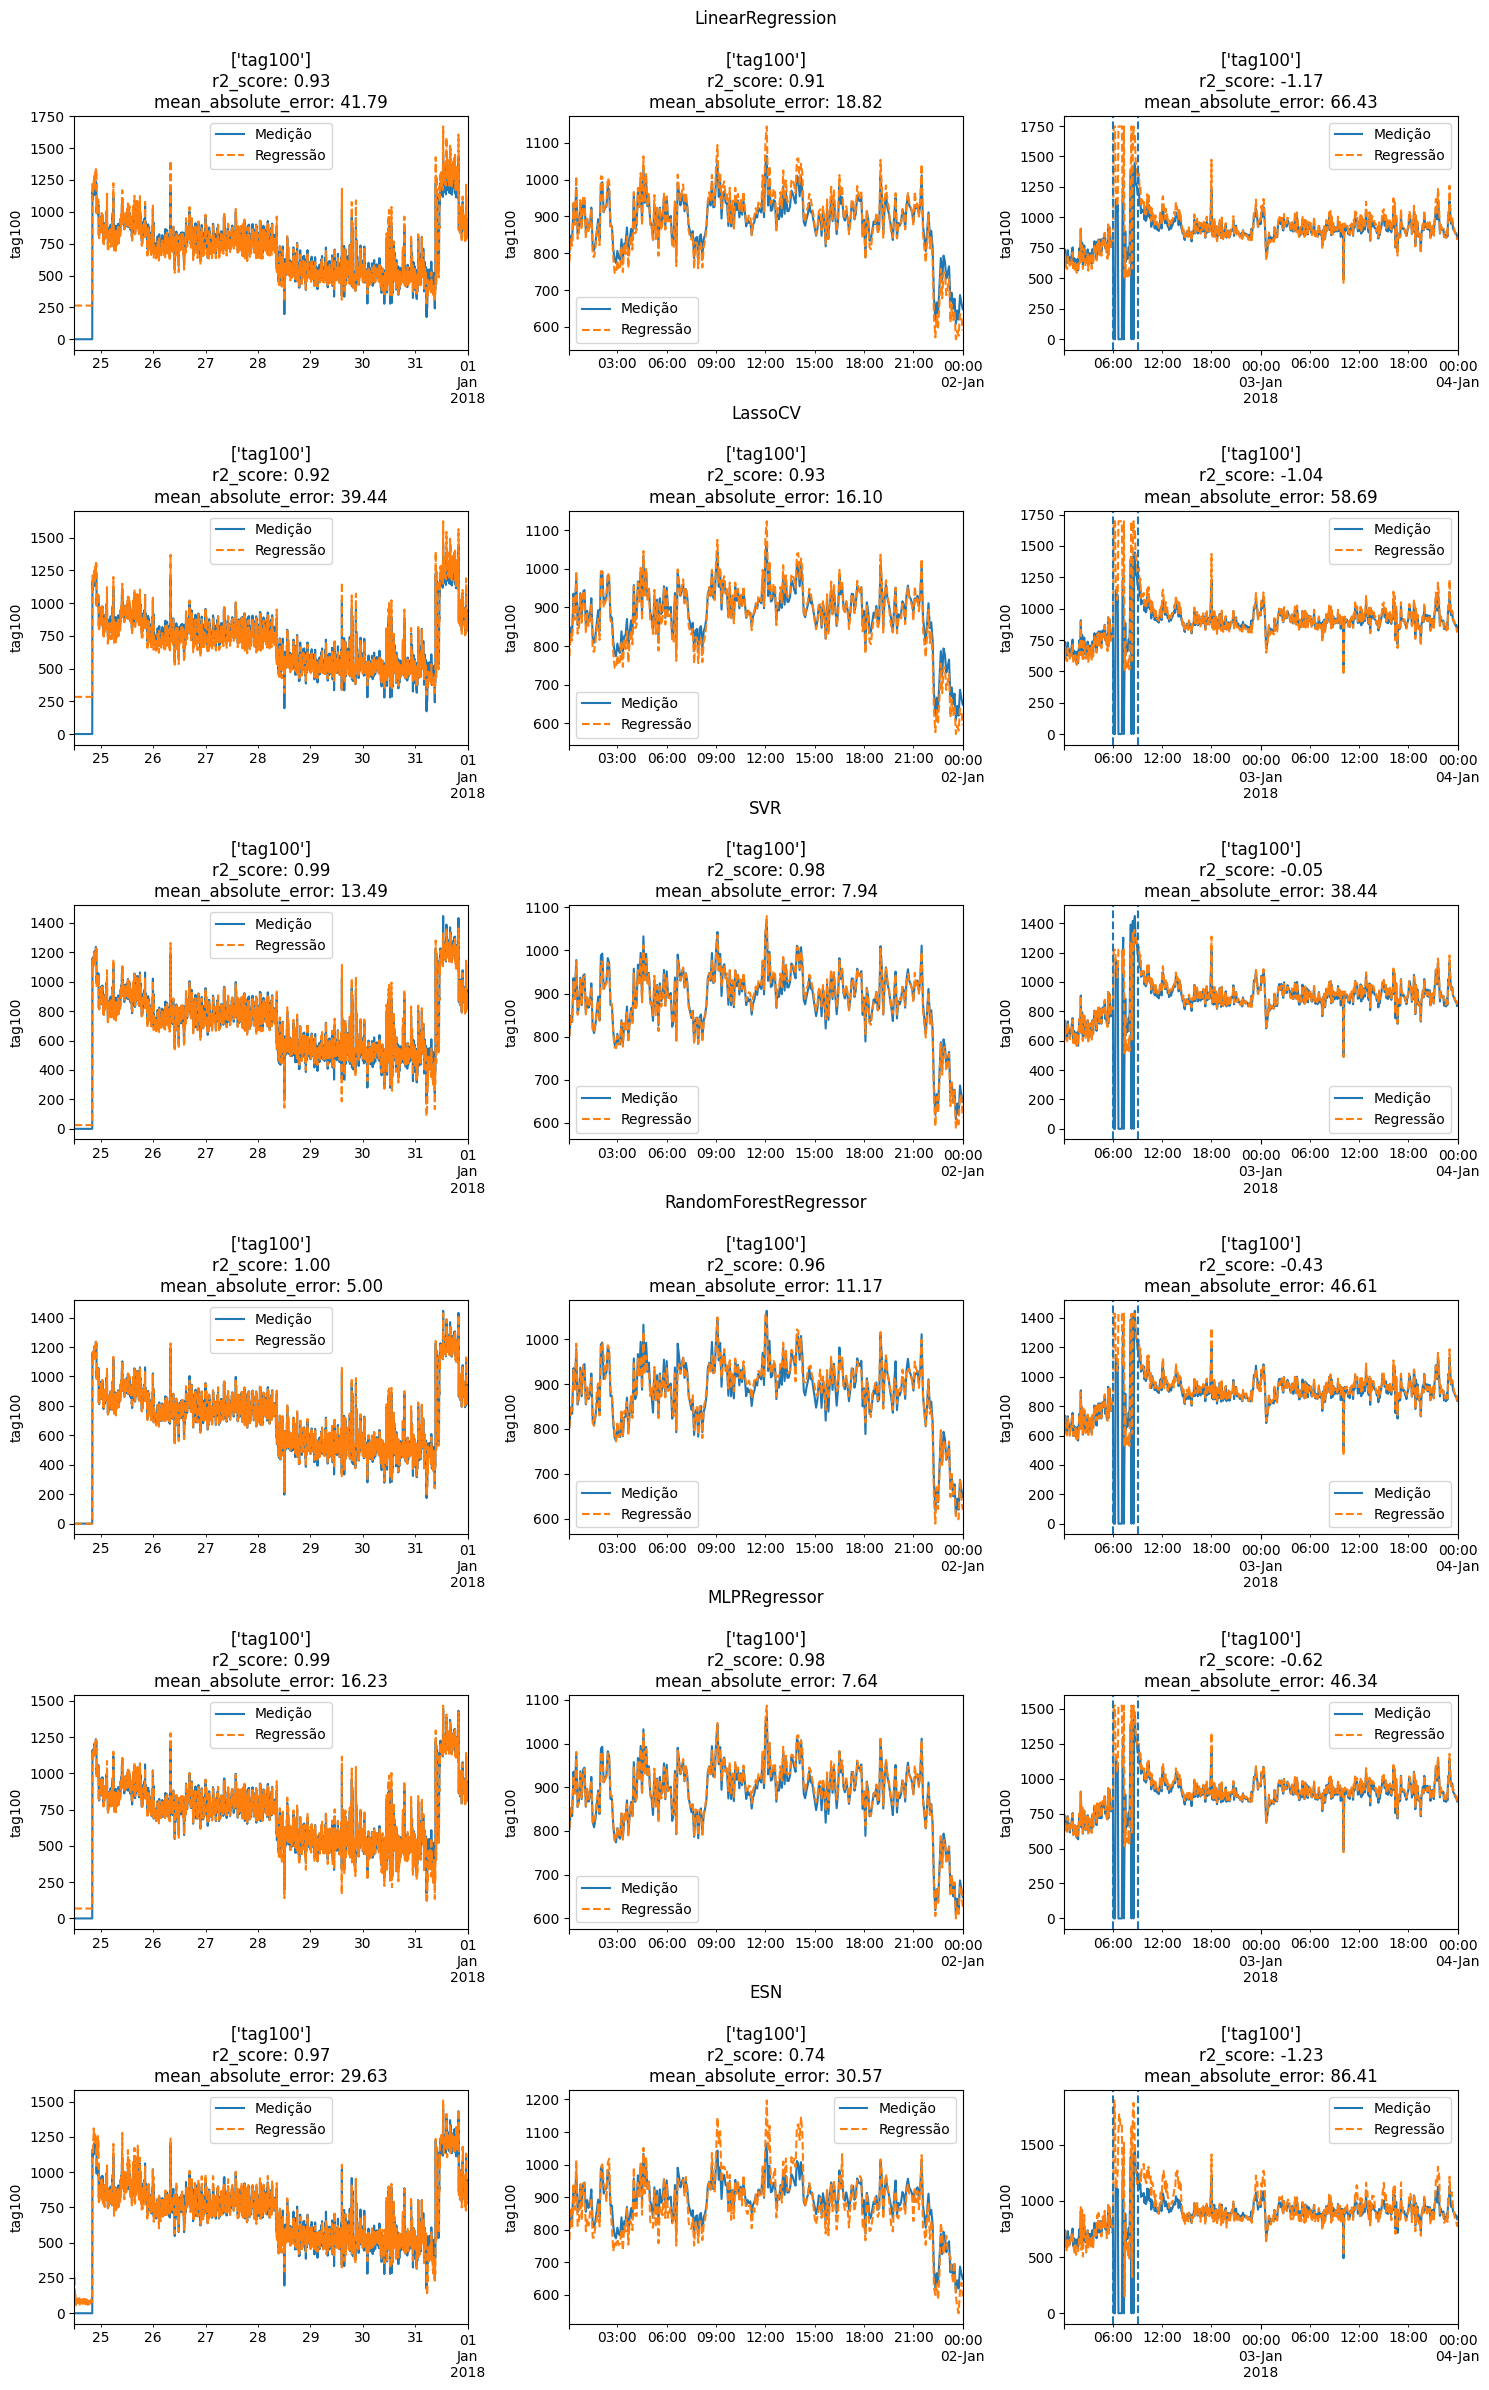

In [18]:
%%time

tab_pred, tab_detec, tab_times = bibmon.tabela_comparativa(modelos, X_treino['tag102'], 
                                                           X_validacao['tag102'], X_teste['tag102'], 
                                                           Y_treino, Y_validacao, Y_teste,
                                                           f_pp_treino = preproc_tr,
                                                           f_pp_teste = preproc_ts,
                                                           #a_pp_treino = args_preproc_tr,
                                                           a_pp_teste = args_preproc_ts,                        
                                                           metricas = mtr, tam_janela_count = 3, limCount = 2,
                                                           falha_inicio = '2018-01-02 06:00:00',
                                                           falha_fim = '2018-01-02 09:00:00')                       

In [19]:
display(tab_pred.round(3))
display(tab_detec.round(3))
display(tab_times.round(2))

Treino  Validação   Teste
Métricas            Modelos                                         
mean_absolute_error ESN                    29.635     30.571  86.412
                    LassoCV                39.442     16.098  58.693
                    LinearRegression       41.789     18.821  66.430
                    MLPRegressor           16.233      7.643  46.338
                    RandomForestRegressor   4.995     11.175  46.607
                    SVR                    13.490      7.940  38.438
r2_score            ESN                     0.973      0.738  -1.225
                    LassoCV                 0.924      0.931  -1.035
                    LinearRegression        0.926      0.910  -1.175
                    MLPRegressor            0.988      0.985  -0.618
                    RandomForestRegressor   0.999      0.964  -0.435
                    SVR                     0.994      0.983  -0.047

FDR    FAR
Alarmes                       Modelos                            
alarmCount WS=3, limCount = 2 ESN                    0.528  0.076
                              LassoCV                0.694  0.024
                              LinearRegression       0.750  0.046
                              MLPRegressor           0.750  0.013
                              RandomForestRegressor  0.694  0.000
                              SVR                    0.722  0.006
alarmOutlier                  ESN                    0.639  0.098
                              LassoCV                0.778  0.044
                              LinearRegression       0.833  0.083
                              MLPRegressor           0.806  0.063
                              RandomForestRegressor  0.750  0.028
                              SVR                    0.778  0.020

Treino   Teste
LinearRegression         0.00    0.00
LassoCV                 21.69    0.00
SVR                     50.60   48.94
RandomForestRegressor  184.66  215.47
MLPRegressor           446.22    0.00
ESN                    319.10   93.07

Pode-se concluir que, utilizando apenas a variável relevante, os outros modelos alcançam desempenhos comparáveis ao `RandomForest`.

## Considerações finais

Neste notebook, um exemplo de estudo de monitoramento offline foi apresentado utilizando as funções `analise_completa` e `tabela_comparativa`.

Para um exemplo de utilização das funcionalidades da BibMon de maneira mais flexível, favor consultar o notebook **monitoramento_tennessee.ipynb**, em que são utilizadas funções de mais baixo nível de abstração para efetuar as análises.